## MF731 Homework 3
### Edited by Xuyang Liu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 2. Component risk measures for an equity portfolio.

In [2]:
M = 50
alpha = 0.99
gamma = 25
lamda = 0.94
theta = 0.96
port = 15000000
weight = 0.2

pos = np.array([port*weight] * 5)
data = pd.read_excel("Five_Stock_Prices.xlsx",index_col=0)
logret = np.log(data/data.shift(1)).dropna()

In [3]:
# We use oldest M days to obtain inital mu and sigma
logreti = logret[0:M]
logret_t = logret[M:]
mu = logreti.mean().values
sigma = logreti.cov().values

In [4]:
VaRz = norm.ppf(alpha)
SRz = (1/(1-alpha)) * norm.pdf(norm.ppf(alpha)) 
# I dont know how to convert into Spectral Risk Measure, just use the ES, i'll change it later.


In [5]:
N = len(logret)
n = len(logret_t)
var_data = []
sr_data = []
mar_var_data = np.zeros(shape=(n, 5))
mar_sr_data = np.zeros(shape=(n, 5))
comp_var_data = np.zeros(shape=(n, 5))
comp_sr_data = np.zeros(shape=(n, 5))
rel_comp_var_data = np.zeros(shape=(n, 5))
rel_comp_sr_data = np.zeros(shape=(n, 5))
rel_pos_size = np.zeros(shape=(n, 5))

for i in range(len(logret_t)):
    
    sigma = theta * sigma + (1-theta) * (np.mat(logret_t.iloc[i].values)-np.mat(mu)).T * (np.mat(logret_t.iloc[i].values)-np.mat(mu))
    mu = lamda * mu + (1-lamda) * logret_t.iloc[i].values
    sigma = np.asarray(sigma)
    mu = np.asarray(mu)
    
    v = -pos.dot(mu) + ((pos.dot(sigma.dot(pos)))**0.5)* VaRz
    var_data.append(v)
    s = -pos.dot(mu) + ((pos.dot(sigma.dot(pos)))**0.5)* SRz
    sr_data.append(s)
    mar_var_data[i] = -mu + ((sigma.dot(pos)).T)/(((sigma.dot(pos)).T)**0.5) * VaRz
    mar_sr_data[i] = -mu + ((sigma.dot(pos)).T)/(((sigma.dot(pos)).T)**0.5) * SRz
    comp_var_data[i] = mar_var_data[i] * pos
    comp_sr_data[i] = mar_sr_data[i] * pos
    
    rel_comp_var_data[i] = 100*comp_var_data[i]/var_data[i]
    rel_comp_sr_data[i] = 100*comp_sr_data[i]/sr_data[i]
    rel_pos_size[i] = 100*((sigma.dot(pos)).T*pos/(pos.dot((sigma.dot(pos)).T)))
    
    
    

<AxesSubplot:xlabel='Date'>

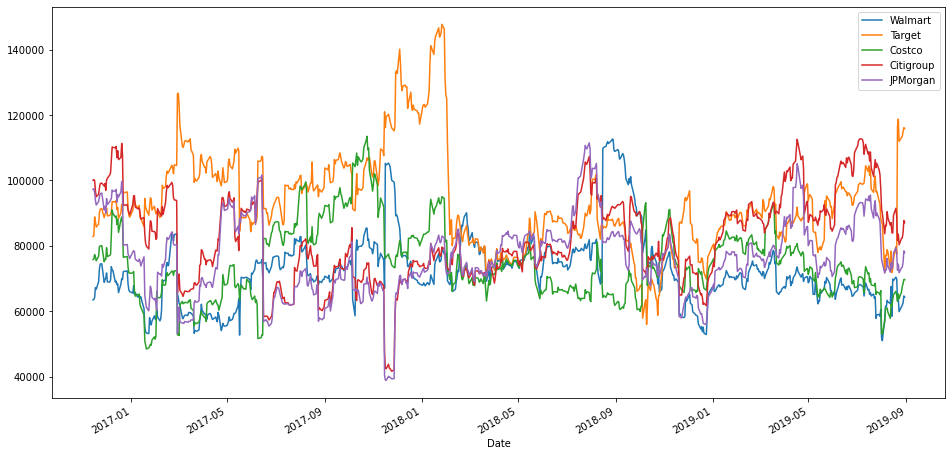

In [6]:
DF1 = pd.DataFrame(rel_comp_var_data, index=logret_t.index, columns=data.columns)
DF1.plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

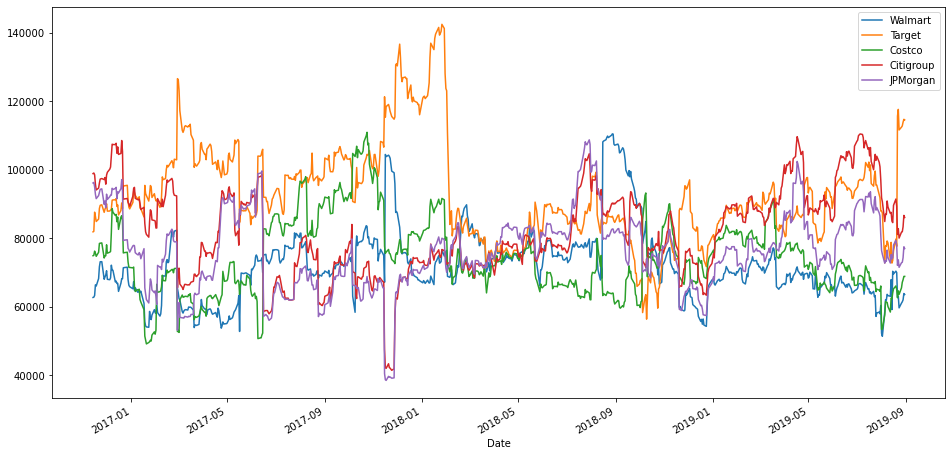

In [7]:
DF2 = pd.DataFrame(rel_comp_sr_data, index=logret_t.index, columns=data.columns)
DF2.plot(figsize=(16, 8))

<AxesSubplot:xlabel='Date'>

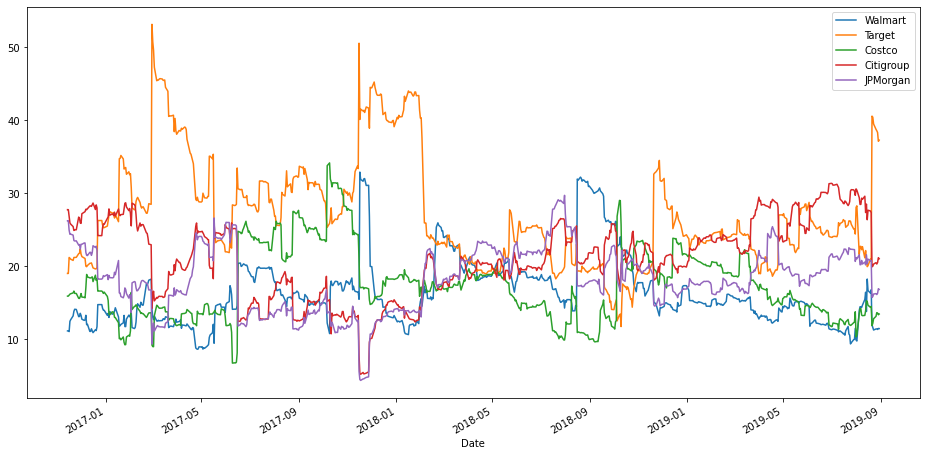

In [8]:
DF3 = pd.DataFrame(rel_pos_size, index=logret_t.index, columns=data.columns)
DF3.plot(figsize=(16, 8))

##### Yes,   the component risk measure plots is very close to the variance contribution plot